# Support Vector Machine - SVM

Las Máquinas de vectores de soporte vectorial son un conjunto de algoritmos de aprendizaje supervisado para resolver problemas de **clasificación y regresión**.
Dado un conjunto de ejemplos de entrenamiento, podemos etiquetar las clases y entrenar una SVM para contruir un modelo que **prediga la clase de nueva muestra**.
Representa los puntos de muestra en el espacio, separando las clases en dos espacios lo más amplio pposible mediante un hiperplano de separación, denominado vector de soporte.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flores = sns.load_dataset('iris')

In [3]:
flores

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [4]:
# vemos los tipos de especies que tenemos de flores
flores['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

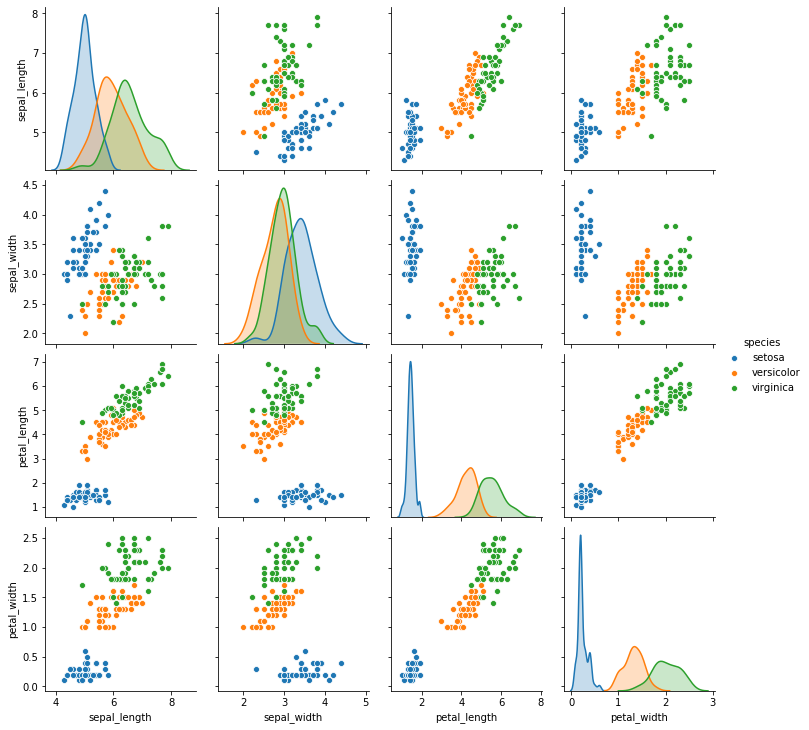

In [5]:
# graficamos cada una de las especies 
sns.pairplot(flores, hue='species')

In [6]:
from sklearn.model_selection import train_test_split

X = flores.drop('species', axis=1)
y = flores['species']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
from sklearn.svm import SVC
modelo = SVC(gamma='auto')

In [18]:
# entrenamos el modelo
modelo.fit(X_train, y_train)

In [21]:
predicciones = modelo.predict(X_test)
predicciones

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor'], dtype=object)

In [22]:
# comparamos resultados
dicc = {'species_test':y_test, 'species_predicted':predicciones}
pd.DataFrame(dicc)

species_test species_predicted
101    virginica         virginica
54    versicolor        versicolor
11        setosa            setosa
64    versicolor        versicolor
118    virginica         virginica
102    virginica         virginica
61    versicolor        versicolor
85    versicolor        versicolor
107    virginica         virginica
3         setosa            setosa
109    virginica         virginica
30        setosa            setosa
37        setosa            setosa
44        setosa            setosa
22        setosa            setosa
35        setosa            setosa
86    versicolor        versicolor
67    versicolor        versicolor
47        setosa            setosa
149    virginica         virginica
36        setosa            setosa
45        setosa            setosa
16        setosa            setosa
42        setosa            setosa
74    versicolor        versicolor
66    versicolor        versicolor
106    virginica        versicolor
55    versicolor        versicolor
127    virginica         virginica
4         setosa            setosa
133    virginica         virginica
123    virginica         virginica
27        setosa            setosa
94    versicolor        versicolor
57    versicolor        versicolor
34        setosa            setosa
21        setosa            setosa
114    virginica         virginica
130    virginica         virginica
10        setosa            setosa
134    virginica         virginica
83    versicolor         virginica
116    virginica         virginica
1         setosa            setosa
58    versicolor        versicolor

In [23]:
# comprobamos precisión y maytriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.92      0.92      0.92        13
   virginica       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [25]:
print(confusion_matrix(y_test, predicciones))

[[18  0  0]
 [ 0 12  1]
 [ 0  1 13]]
